In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import re as re


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()



#Comienzo del Analisis exploratorio - EDA (Exploratory Data Analysis)

In [38]:
df = pd.read_csv('/content/Balanced_AHR.csv')

print("Shape:", df.shape)
df.head()

Shape: (7615, 7)


,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,IMPOSIBLE DESCANSAR,2,El fin de semana mi pareja y yo hicimos una re...,Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,0
1,1,No es oro todo lo que reluce,3,"El hotel en general está bien, las habtiacione...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
2,2,Un buen hotel con mucho ruido.,3,"El hotel es moderno, amplio y limpio, pero no ...",Seville_Province_of_Seville_Andalucia,Hotel_Rey_Alfonso_X,3
3,3,SIN CALEFACCIÓN OPERATIVA Y CON FRÍO,2,Calefacción averiada o no operativa. Se coment...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0
4,4,Deja bastante que desear.,2,Este hotel ha bajado notoriamente su categoria...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,0


In [39]:
df.sample(20)

,Unnamed: 0,title,rating,review_text,location,hotel,label
2554,2554,Deja mucho que desear,1,"Estuvimos del 4 al 6 de Mayo, está en pleno ce...",Cordoba_Province_of_Cordoba_Andalucia,Hotel_Gran_Plaza,0
2015,2015,Mala recepción y falta de información,3,A mi llegada al hotel no se me solicitó mi doc...,Granada_Province_of_Granada_Andalucia,Melia_Granada,3
4261,4261,"Global: Satisfactoria, pero hay detalles que m...",3,Es la tercera vez que nos hospedamos en los ho...,NaN,NaN,3
5245,5245,Mejor hotel de sevilla,5,"Extraordinario todo ubicación,limpieza los mej...",Seville_Province_of_Seville_Andalucia,Hotel_Cetina_Sevilla,1
1830,1830,"Habitación detrás de recepción, poca intimidad.",3,Nos dieron una habitación justo detrás de rece...,Granada_Province_of_Granada_Andalucia,Hotelito_Boutique_Suecia,3
1424,1424,"Buen lugar y sitio acojedor, peeeero....",3,"El lugar en sí esta genial, limpio, cuidado, o...",Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Villa_Alicia_Guest_House,3
167,167,Si no fuera por el desayuno...,3,El hotel está bien situado. A 10min a pie de t...,Seville_Province_of_Seville_Andalucia,Hotel_Eurostars_Regina,3
1276,1276,NO 1 planta,3,"El Hotel está muy bien, centrico y accesible d...",Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Ibis_Malaga_Centro_Ciudad,3
2889,2889,"Excelente ubicación, limpieza regular.",3,"La ubicación es fantástica, la casa tiene enca...",Cordoba_Province_of_Cordoba_Andalucia,Casa_Turistica_La_Torre,3
2655,2655,buena ubicación,3,"El hotel esta bastante bien, el desayuno es co...",Cordoba_Province_of_Cordoba_Andalucia,Hotel_Macia_Alfaros,3


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615 entries, 0 to 7614
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   7615 non-null   int64 
 1   title        7615 non-null   object
 2   rating       7615 non-null   int64 
 3   review_text  7615 non-null   object
 4   location     6819 non-null   object
 5   hotel        6819 non-null   object
 6   label        7615 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 416.6+ KB


In [41]:
df.columns


Index(['Unnamed: 0', 'title', 'rating', 'review_text', 'location', 'hotel',
       'label'],
      dtype='object')

In [48]:
df.isnull().sum()


,0
Unnamed: 0,0
title,0
rating,0
review_text,0
location,796
hotel,796
label,0
text_length,0


In [43]:
df["label"].value_counts()




,count
label,
0,2671
1,2670
3,2274


In [44]:
df["label"].value_counts(normalize=True) * 100


,proportion
label,
0,35.075509
1,35.062377
3,29.862114


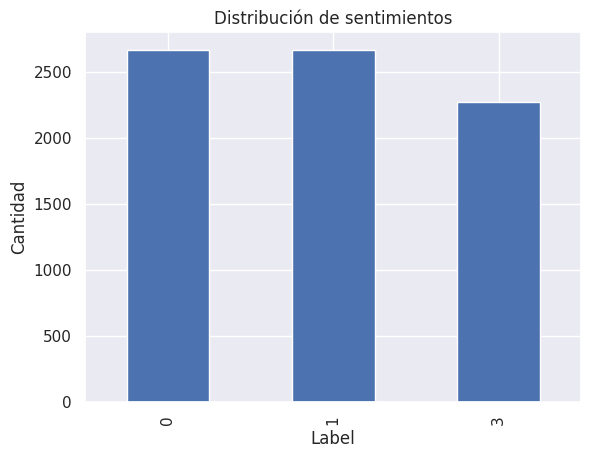

In [45]:
df["label"].value_counts().plot(
    kind="bar",
    title="Distribución de sentimientos",
    xlabel="Label",
    ylabel="Cantidad"
)
plt.show()


In [67]:
df["label"].unique()


array([0, 3, 1])

In [69]:
df = df[df["label"].isin([0, 1])]


Primero, se crea una nueva columna en el DataFrame **df** llamada **text_length**. Esta columna almacena la longitud de cada reseña, es decir, el número de caracteres en la columna review_text. Lo hace convirtiendo cada reseña a string y luego aplicando la función len() para obtener la longitud.

Segundo, **df**["text_length"].describe() muestra un resumen estadístico de esta nueva columna **text_length**, incluyendo el recuento de reseñas, el promedio de caracteres, la desviación estándar, el valor mínimo, los cuartiles (25%, 50%, 75%) y el valor máximo.

In [46]:
df["text_length"] = df["review_text"].astype(str).apply(len)

df["text_length"].describe()


,text_length
count,7615.000000
mean,498.353119
std,356.901921
min,64.000000
25%,258.000000
50%,392.000000
75%,678.000000
max,7778.000000


El promedio por reseña tiene una extension media de `mean	498.353119` letras


---



EL 50% de las reseñas uso una cantidad de `50%	392.000000` letras

*"Me alojé aquí por trabajo tres noches. La ubicación es estratégica, muy cerca del metro y de la zona comercial, lo cual es muy cómodo. Sin embargo, el aislamiento acústico es deficiente; se oye bastante el tráfico y a los huéspedes del pasillo. La habitación estaba limpia y la cama era correcta, sin lujos. El desayuno es variado pero la calidad del café es mejorable. Un hotel funcional."*



---



La cantidad de letras minima es de `min	64.000000`

*"Atención correcta y desayuno decente, pero esa cama estaba dura."*

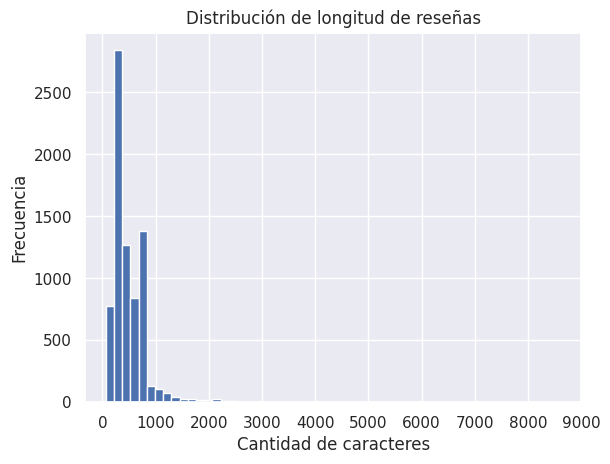

In [65]:
plt.hist(df["text_length"], bins=50)
plt.title("Distribución de longitud de reseñas")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")

# Obtener el valor máximo de la longitud del texto para establecer los límites del eje x
max_text_length = df["text_length"].max()

# Establecer los ticks del eje x de 500 en 500
plt.xticks(range(0, int(max_text_length) + 2000, 1000))

plt.show()

In [66]:
fig = px.histogram(
    df,
    x="text_length",
    nbins=50,
    title="Distribución de longitud de reseñas",
    labels={
        "text_length": "Cantidad de caracteres",
        "count": "Frecuencia"
    }
)

fig.show()


TRANSFORMACION DE LOS DATOS

In [70]:
df = df.drop(
    columns=[
        "Unnamed: 0",
        "location",
        "hotel",
        "rating",
        "title"
    ],
    errors="ignore"
)


In [71]:
df = df.rename(
    columns={
        "review_text": "text",
        "label": "y"
    }
)


In [72]:
df.head()


,text,y,text_length
0,El fin de semana mi pareja y yo hicimos una re...,0,790
3,Calefacción averiada o no operativa. Se coment...,0,200
4,Este hotel ha bajado notoriamente su categoria...,0,257
5,"Son pequeños, se bloquean y son insuficientes ...",0,268
6,Mal mal y mal. Una enorme diferencia de trato ...,0,702


## Preprocesamiento de texto

Se aplica una limpieza básica del texto orientada a un MVP:
- normalización a minúsculas
- eliminación de URLs y menciones
- eliminación de caracteres especiales

In [74]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # eliminar URLs
    text = re.sub(r"@\w+", "", text)            # eliminar menciones
    text = re.sub(r"[^a-záéíóúñü\s]", "", text) # eliminar símbolos
    text = re.sub(r"\s+", " ", text).strip()    # espacios extra
    return text


In [75]:
df["clean_text"] = df["text"].apply(clean_text)


In [77]:
df[["text", "clean_text"]].sample(10)


,text,clean_text
2346,Sobre el hotel no tengo queja alguna. Únicamen...,sobre el hotel no tengo queja alguna únicament...
596,No puedo opinar sobre este hotel porque no lle...,no puedo opinar sobre este hotel porque no lle...
1738,Llegamos al hotel pensando en su encanto por s...,llegamos al hotel pensando en su encanto por s...
3312,"Fuimos sólo a comer al restaurante, tardaron m...",fuimos sólo a comer al restaurante tardaron mu...
7158,Apartamentos elegantes cerca del centro del ca...,apartamentos elegantes cerca del centro del ca...
3170,"Un hotel, por no llamarlo pensión, que prefier...",un hotel por no llamarlo pensión que prefiere ...
497,Esta pensión me dejó sin palabras. Al entrar t...,esta pensión me dejó sin palabras al entrar te...
5927,"He pasado unos días de navidad con mi familia,...",he pasado unos días de navidad con mi familia ...
5966,"excelente ubicacion, limpio, personal super am...",excelente ubicacion limpio personal super amab...
5146,Contratamos esta pensión por su cercanía al ce...,contratamos esta pensión por su cercanía al ce...


In [78]:
(df["clean_text"].str.len() == 0).sum()


np.int64(0)

In [79]:
df.shape


(5341, 4)

In [80]:
df.head()


,text,y,text_length,clean_text
0,El fin de semana mi pareja y yo hicimos una re...,0,790,el fin de semana mi pareja y yo hicimos una re...
3,Calefacción averiada o no operativa. Se coment...,0,200,calefacción averiada o no operativa se comenta...
4,Este hotel ha bajado notoriamente su categoria...,0,257,este hotel ha bajado notoriamente su categoria...
5,"Son pequeños, se bloquean y son insuficientes ...",0,268,son pequeños se bloquean y son insuficientes p...
6,Mal mal y mal. Una enorme diferencia de trato ...,0,702,mal mal y mal una enorme diferencia de trato c...


#Para finalizar el EDA

Exportamos el df ya pulido para empezar a trabajar

In [81]:
df_model = df[["clean_text", "y"]]

df_model.to_csv("dataset_modelado_sentimiento.csv", index=False)
